<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Regress%C3%A3o_Previs%C3%A3o_Vendas_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos fazer a previsão de vendas futuras de um supermercado usando o modelo de ML

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


- Analise dos dados

In [118]:
base = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

In [119]:
base.shape

(1000, 17)

In [120]:
base.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Precisamos encontrar o total de vendas

In [121]:
base['Total_Vendas'] = base['Quantity'] * base['Unit price']

In [122]:
base.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total_Vendas
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17


In [123]:
base.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Total_Vendas               0
dtype: int64

In [15]:
base.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Total_Vendas
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.00000
mean,55.672130,5.510000,15.379369,307.58738,307.58738,4.761905e+00,15.379369,6.97270,307.58738
std,26.494628,2.923431,11.708825,234.17651,234.17651,6.220360e-14,11.708825,1.71858,234.17651
min,10.080000,1.000000,0.508500,10.17000,10.17000,4.761905e+00,0.508500,4.00000,10.17000
25%,32.875000,3.000000,5.924875,118.49750,118.49750,4.761905e+00,5.924875,5.50000,118.49750
50%,55.230000,5.000000,12.088000,241.76000,241.76000,4.761905e+00,12.088000,7.00000,241.76000
75%,77.935000,8.000000,22.445250,448.90500,448.90500,4.761905e+00,22.445250,8.50000,448.90500
max,99.960000,10.000000,49.650000,993.00000,993.00000,4.761905e+00,49.650000,10.00000,993.00000


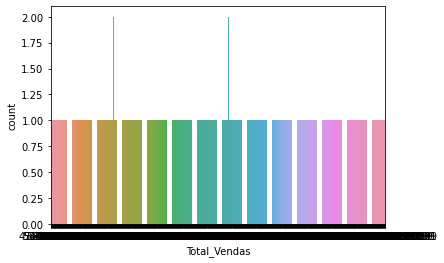

In [16]:
sns.countplot( x = base['Total_Vendas']);

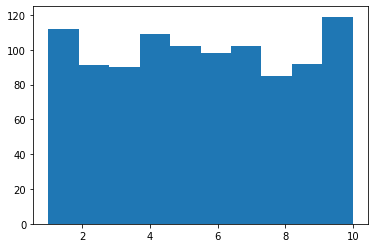

In [19]:
plt.hist(x = base['Quantity']);

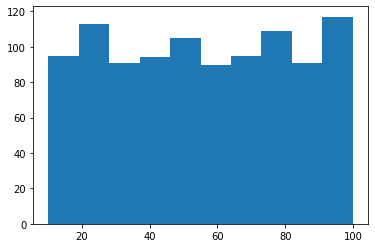

In [20]:
plt.hist( x = base['Unit price']);

In [22]:
#transf categoricas em numericos

In [24]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder6 = LabelEncoder()

In [27]:
base['Branch'] = label_encoder1.fit_transform(base['Branch'])
base['City'] = label_encoder2.fit_transform(base['City'])
base['Customer type'] = label_encoder3.fit_transform(base['Customer type'])
base['Gender'] = label_encoder4.fit_transform(base['Gender'])
base['Product line'] = label_encoder5.fit_transform(base['Product line'])
base['Payment'] = label_encoder6.fit_transform(base['Payment'])

In [28]:
base.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total_Vendas
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,522.83,1/5/2019,13:08,2,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,76.40,3/8/2019,10:29,0,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,324.31,3/3/2019,13:23,1,324.31,4.761905,16.2155,7.4,324.31
3,123-19-1176,0,2,0,1,3,58.22,8,23.2880,465.76,1/27/2019,20:33,2,465.76,4.761905,23.2880,8.4,465.76
4,373-73-7910,0,2,1,1,5,86.31,7,30.2085,604.17,2/8/2019,10:37,2,604.17,4.761905,30.2085,5.3,604.17


In [126]:
x = base.iloc[:,[2,3,4,5,6,7,12]].values

In [127]:
y = base.iloc[:,17].values

In [128]:
x.shape

(1000, 7)

In [129]:
y.shape

(1000,)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=1)

In [96]:
x_treino.shape

(700, 7)

In [97]:
y_treino.shape

(700,)

In [98]:
x_teste.shape

(300, 7)

In [99]:
y_teste.shape

(300,)

**Decision Tree**

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
regressao_arvore = DecisionTreeRegressor(criterion='mse')

In [102]:
regressao_arvore.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse')

In [103]:
previsao = regressao_arvore.predict(x_teste)
previsao

array([502.62, 387.92, 318.55, 155.  , 186.62,  54.36, 155.24,  70.91,
       207.27, 832.5 , 259.  , 649.5 ,  44.46, 702.63, 277.34, 524.88,
       277.34, 414.72,  79.74, 125.64, 196.6 , 416.5 , 172.45, 139.02,
       668.43, 111.34, 318.42,  33.52,  73.5 , 356.95,  91.11, 137.22,
       241.92, 199.58, 674.59, 598.98, 772.  , 812.52,  59.05, 641.9 ,
       194.22, 375.55, 190.68, 702.63,  89.69, 127.  ,  97.16,  99.84,
        25.29,  39.75, 146.79, 381.68, 155.82,  68.98, 575.12, 161.25,
       320.53, 298.64, 416.5 ,  99.84, 707.44,  55.12, 385.1 ,  53.78,
        13.98, 308.85, 259.6 , 320.53, 545.5 , 435.6 ,  77.52, 194.95,
       121.92,  66.4 , 787.7 , 158.1 , 139.02, 587.6 , 101.43,  98.88,
       127.  , 152.8 , 277.34, 585.66,  77.52, 115.78,  22.38,  29.52,
       139.02, 121.74, 250.6 , 274.2 , 192.7 , 486.63, 410.72, 186.62,
       215.04, 228.18, 127.  , 670.24, 138.65, 416.5 , 211.56,  71.95,
       333.4 , 425.18, 742.2 , 298.64,  88.85,  80.71,  38.42, 522.83,
      

In [104]:
y_teste

array([504.3 , 384.64, 318.05, 143.6 , 186.4 ,  50.62, 153.2 ,  86.  ,
       207.69, 826.3 , 276.6 , 686.  ,  47.4 , 701.37, 258.37, 524.7 ,
       212.45, 413.04,  83.08, 126.44, 197.7 , 431.3 , 184.25, 138.8 ,
       668.78, 106.88, 305.82,  33.63,  73.1 , 335.45,  87.45, 136.14,
       253.36, 199.78, 684.53, 598.26, 783.1 , 815.67,  60.25, 674.5 ,
       214.3 , 385.28, 189.52, 706.95,  89.75, 127.08,  97.94, 112.22,
        25.  ,  40.35, 124.65, 397.68, 157.26,  68.12, 574.88, 147.8 ,
       319.06, 293.88, 410.9 ,  98.2 , 710.32,  66.1 , 387.5 ,  53.72,
        10.17, 324.85, 256.7 , 318.08, 543.6 , 435.66,  77.1 , 183.82,
       119.54,  66.66, 793.9 , 158.7 , 147.04, 558.7 ,  98.7 ,  88.15,
       130.48, 143.26, 285.92, 579.12,  65.7 , 116.06,  22.62,  29.74,
       144.78, 119.72, 240.72, 279.24, 196.95, 454.41, 407.44, 186.8 ,
       217.26, 225.6 , 129.  , 647.76, 142.25, 431.9 , 224.52,  72.17,
       336.35, 420.56, 746.  , 292.2 ,  87.05,  70.56,  38.6 , 522.06,
      

In [105]:
regressao_arvore.score(x_treino, y_treino)

1.0

In [106]:
regressao_arvore.score(x_teste,y_teste)

0.9966663871326967

otimo!! o modelo acerta praticamente tudo

In [110]:
regressao_arvore.predict(np.array([[0,1,1,0,70,9,1]])) #cidade,tipo_cliente,genero,linha_produto,preço,qtd,pagamento

array([626.22])

portanto prevemos o total de vendas usando parametros novos

mais previsoes

In [113]:
regressao_arvore.predict(np.array([[1,2,0,0,100,9,1]])) # a venda total é:

array([890.73])

gráfico

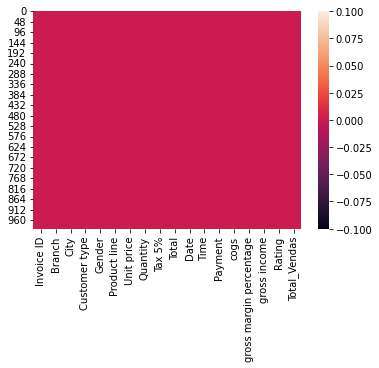

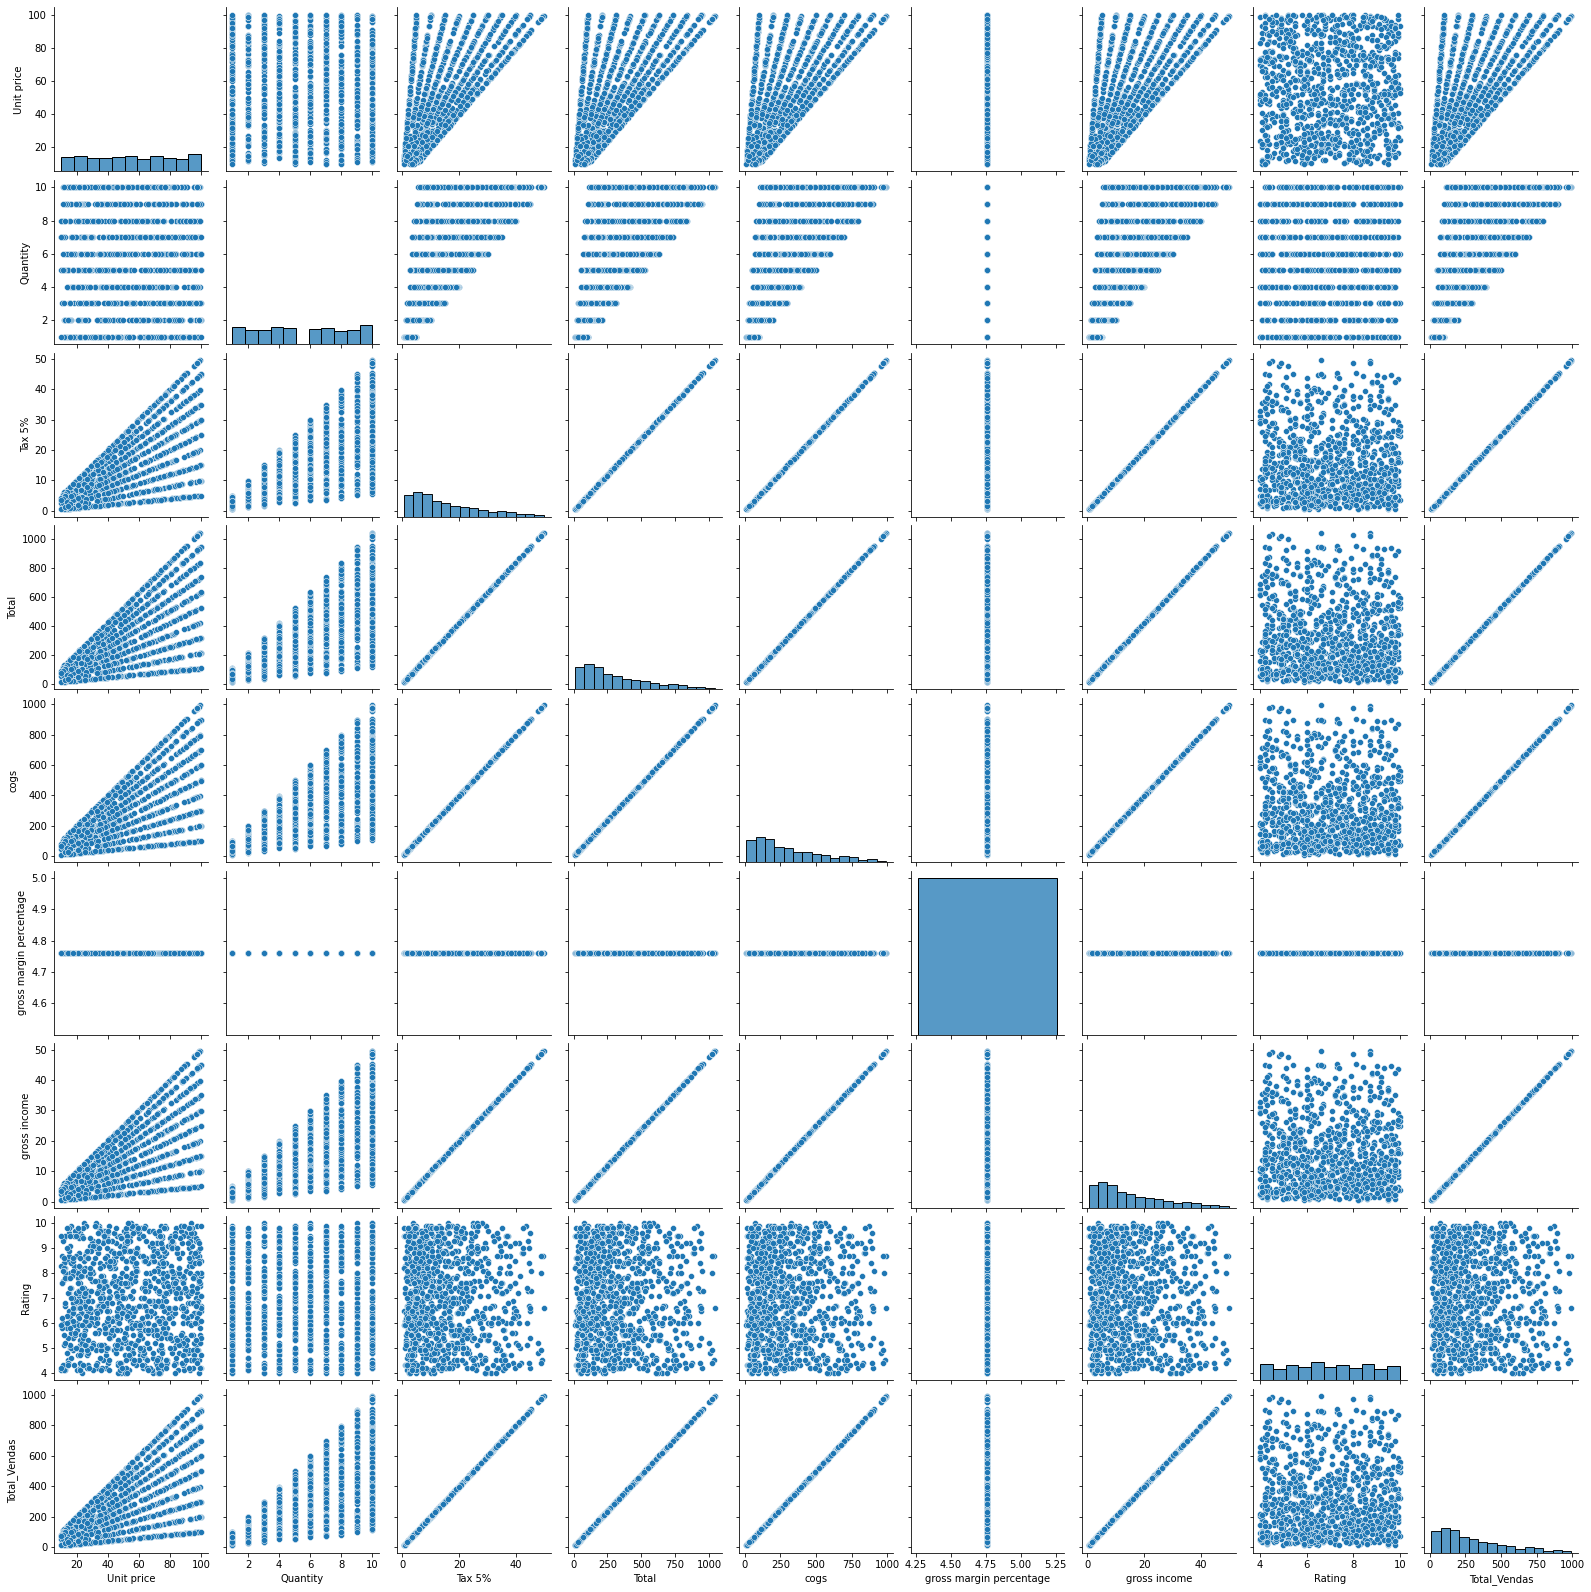

In [148]:
sns.heatmap(base.isnull());
sns.pairplot(base);

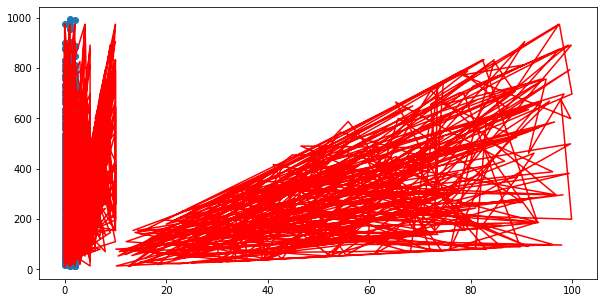

In [164]:
plt.figure(figsize=(10,5))
plt.scatter(x_treino[:,0], y_treino)
plt.plot(x_teste,regressao_arvore.predict(x_teste),color='red');